In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import matplotlib.pyplot as plt 
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
for col in df.columns:
    print(df[col].dtype,col)

int64 id
object diagnosis
float64 radius_mean
float64 texture_mean
float64 perimeter_mean
float64 area_mean
float64 smoothness_mean
float64 compactness_mean
float64 concavity_mean
float64 concave points_mean
float64 symmetry_mean
float64 fractal_dimension_mean
float64 radius_se
float64 texture_se
float64 perimeter_se
float64 area_se
float64 smoothness_se
float64 compactness_se
float64 concavity_se
float64 concave points_se
float64 symmetry_se
float64 fractal_dimension_se
float64 radius_worst
float64 texture_worst
float64 perimeter_worst
float64 area_worst
float64 smoothness_worst
float64 compactness_worst
float64 concavity_worst
float64 concave points_worst
float64 symmetry_worst
float64 fractal_dimension_worst
float64 Unnamed: 32


In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
# taking out the float values \
numerical_col=[]
for col in df.columns:
    if df[col].dtype=='float64':
        numerical_col.append(col)
        

In [9]:
# Finding out the discrete columns 
discrete_col=[]
for col in numerical_col:
    if len(df[col].unique()) <10:
        discrete_col.append(col)

In [10]:
discrete_col

['Unnamed: 32']

In [11]:
# We want to know , how many malignant and benign tumors are there
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

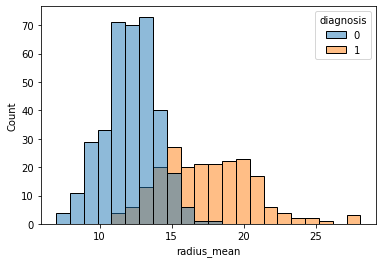

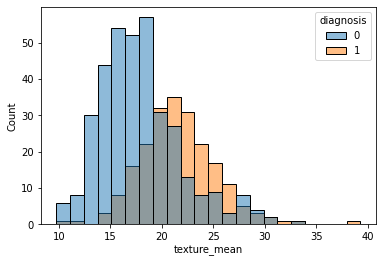

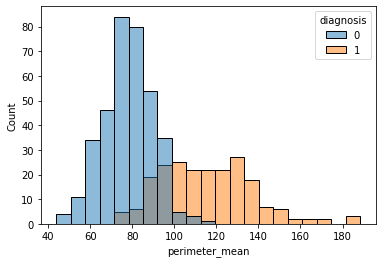

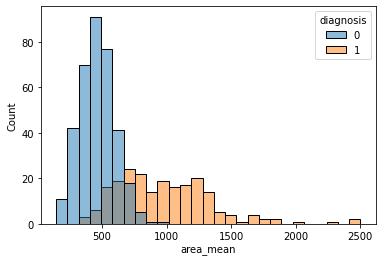

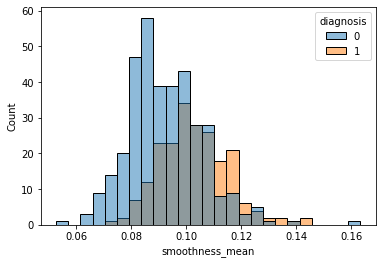

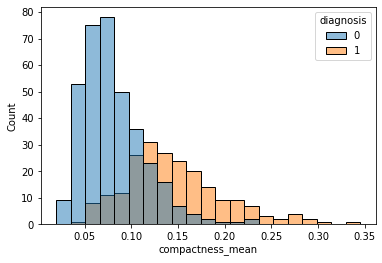

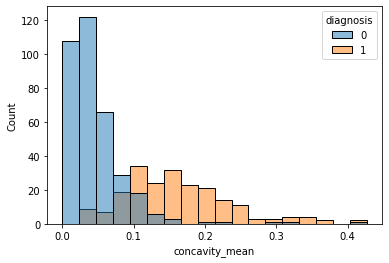

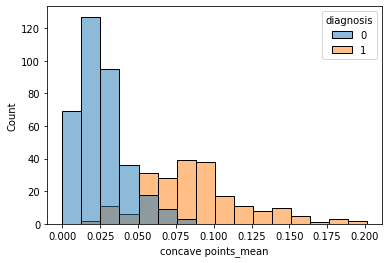

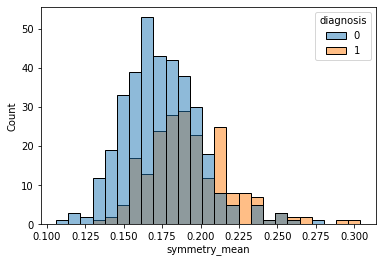

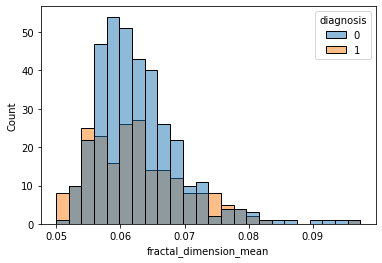

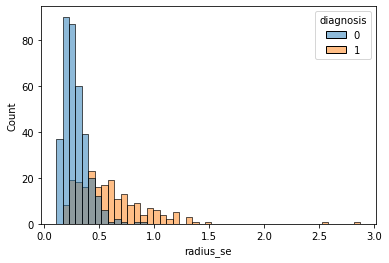

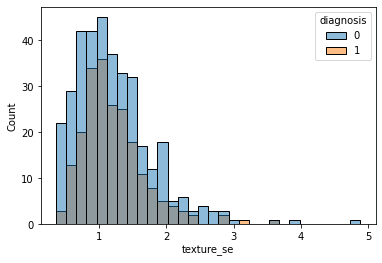

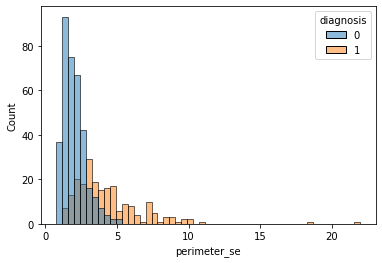

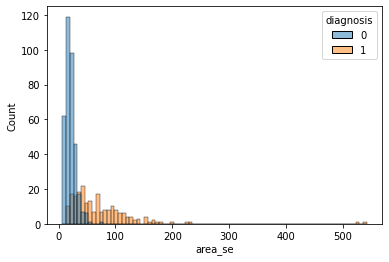

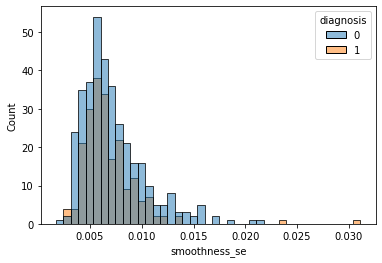

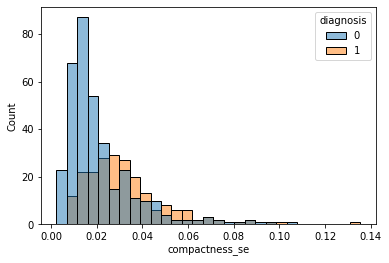

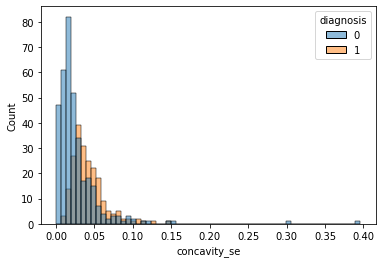

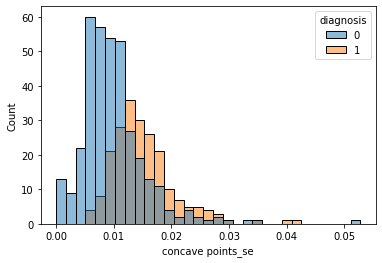

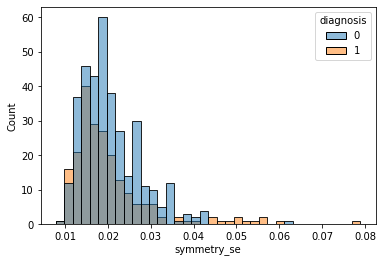

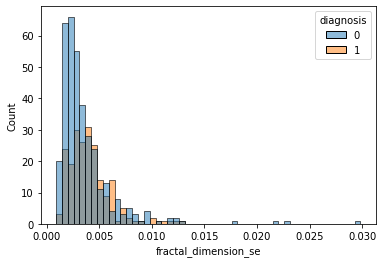

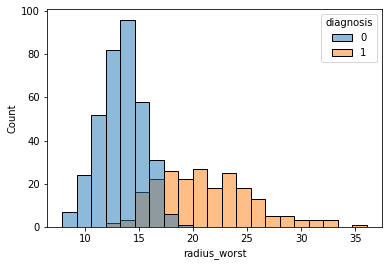

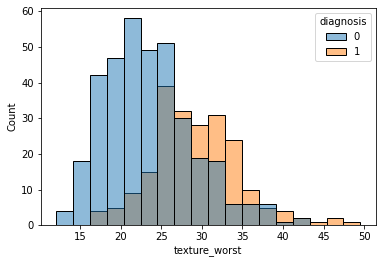

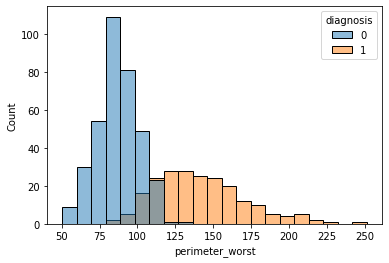

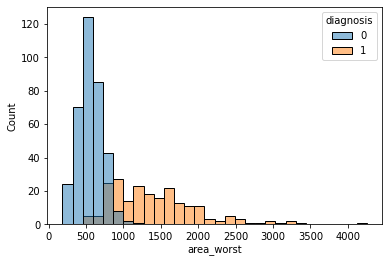

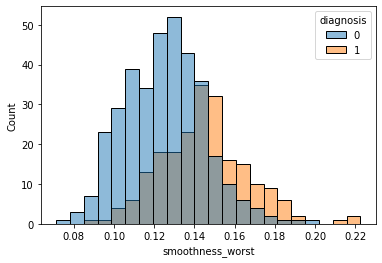

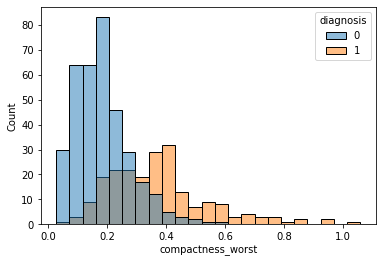

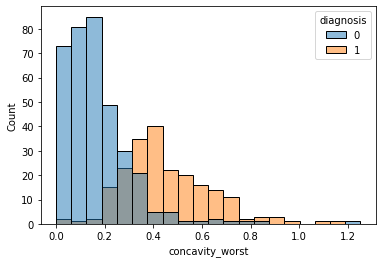

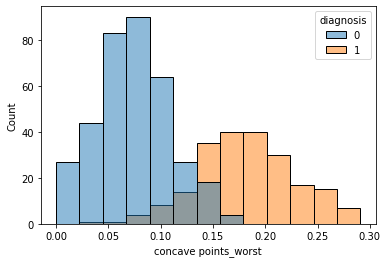

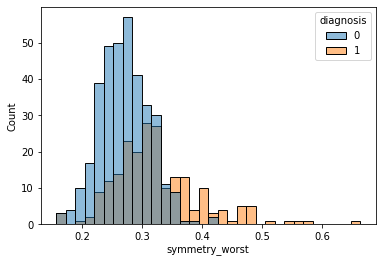

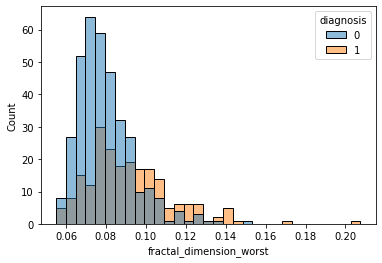

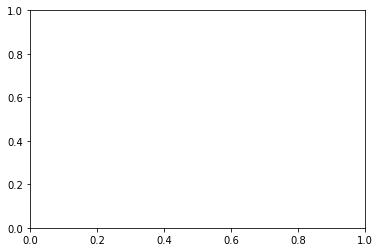

In [13]:
for col in numerical_col:
    sns.histplot(data=df,x=col,hue='diagnosis')
    plt.show()

## From here , we will try to find the best possible values for X

In [14]:
correlation_matrix=df.corr()
correlation_matrix=pd.DataFrame(np.tril(correlation_matrix),columns=correlation_matrix.columns,index=correlation_matrix.columns,)
# To select the variables whose  , correlation is more 

In [15]:
correlation_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
diagnosis,0.039769,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
radius_mean,0.074626,0.730029,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
texture_mean,0.099770,0.415185,0.323782,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


<AxesSubplot:>

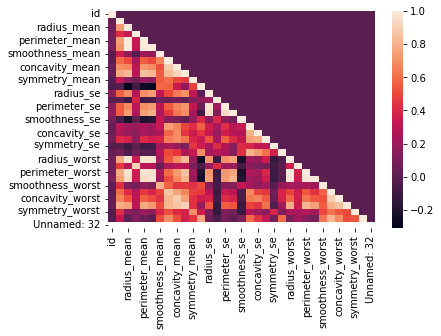

In [16]:
sns.heatmap(data=correlation_matrix)

### We find the correlation which is greater than 0.5 

In [ ]:
df2=df.copy()

In [31]:
correlation_matrix['diagnosis'].loc[(correlation_matrix['diagnosis']>0.5) | (correlation_matrix['diagnosis']<-0.5) ]

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [32]:
# Lets look at radius mean
correlation_matrix['radius_mean'].loc[(correlation_matrix['radius_mean']>0.5) | (correlation_matrix['radius_mean']<-0.5) ]

# As we can see that perimeter mean , area mean are highly inercorrelated things  , so we will try to mean them

radius_mean             1.000000
perimeter_mean          0.997855
area_mean               0.987357
compactness_mean        0.506124
concavity_mean          0.676764
concave points_mean     0.822529
radius_se               0.679090
perimeter_se            0.674172
area_se                 0.735864
radius_worst            0.969539
perimeter_worst         0.965137
area_worst              0.941082
concavity_worst         0.526911
concave points_worst    0.744214
Name: radius_mean, dtype: float64

In [ ]:
# Now what we will do is firstly we will use standard scaler to model them

In [ ]:
'''# First we will try to visualize using PCA whether there is any relation as such

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca_train=pd.DataFrame(pca.fit_transform(df.drop(['diagnosis','Unnamed: 32'],axis=1)),columns=['1st_column','2nd_column'])
pca.explained_variance_ratio_
'''

In [ ]:
'''# how much of variation is accounted for ??
pca_train['diagnosis']=df['diagnosis']
pca_train['diagnosis']=pca_train['diagnosis'].replace({'M':1,'B':0})
'''

In [ ]:
'''sns.relplot(data=pca_train,x='1st_column',y='2nd_column',hue='diagnosis')
'''

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(pca_train.drop('diagnosis',axis=1),pca_train['diagnosis'],test_size=0.2,shuffle=True,stratify=pca_train['diagnosis'])

In [73]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()

In [74]:
sgd.fit(x_train,y_train)
predict=sgd.predict(x_test)
sgd.coef_
sgd.intercept_

array([-1482.97969731])

## Performance metrics for classificationproblems

#### https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve,confusion_matrix


In [76]:
sgd_confusion=confusion_matrix(y_test,predict) # This looks like garbage !

<AxesSubplot:>

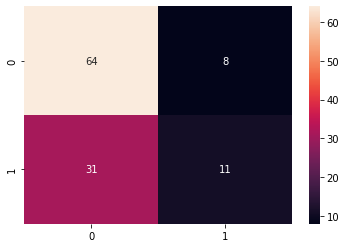

In [77]:
import seaborn as sns
sns.heatmap(sgd_confusion,annot=True)

In [78]:
from sklearn.metrics import precision_score,recall_score,roc_curve

In [79]:
recall_score(y_test,predict)

0.2619047619047619

In [80]:
fpr,tpr,threshold=roc_curve(y_test,predict)



In [81]:
def roc_plot(fpr,tpr,threshold):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'k--') # This is used to plot the dashed 45 degree line
    plt.show()
    

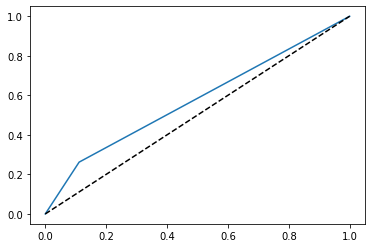

In [82]:
roc_plot(fpr,tpr,threshold) # Basically this proves that the model is really really bad 

### Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,predict)

0.5753968253968254

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logistic_regression=LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

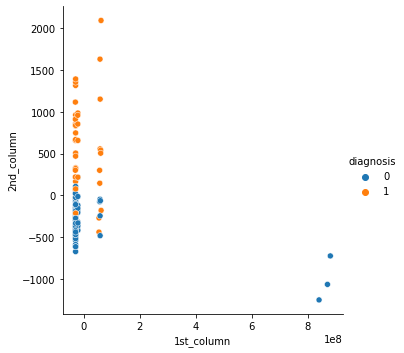

In [86]:
sns.relplot(x=x_test.iloc[:,0],y=x_test.iloc[:,1],hue=y_test)

In [87]:
predict_logistic=logistic_regression.predict(x_test)


In [89]:
precision_score(y_test,predict_logistic)

0.5789473684210527

In [91]:
my_prediction=[]
for value in x_test.iloc[:,0]:
    if value <0:
        my_prediction.append(0)
    else :
        my_prediction.append(1)

In [92]:
precision_score(y_test,my_prediction)

0.5789473684210527